# Q1

The differential equation we are rerquired to solve is:

$$ \frac{dV_{out}}{dt}= \frac{1}{RC}(V_{out} - V_{in})$$

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [42]:
# modelling V_in 
def V_in(t):
    if(int(2*t)&1==0):
        return 1
    else:
        return -1
    
def Vout(V_in, V_out, RC):
    return (1/RC)*(V_in -V_out)
    
def RK_4(x, t, func, h):
    f=func(x,t)
    k1=h*f
    k2=h*func(x+k1/2, t+h/2)
    k3=h*func(x+k2/2, t+h/2)
    k4=h*func(x+k3, t+h)
    x= x + (k1+2*k2+2*k3+k4)/6
    t= t + h
    return [x,t]

In [43]:
#take steps as 0.01
h=0.01
RC=0.01

def func(V_out, t):
    return Vout(V_in(t), V_out, RC)


time=[0]
V1=[0]

t=0
Vo1=0

while(t<=10):
    Vo1=RK_4(Vo1, t, func, h)[0]
    t=RK_4(Vo1, t, func, h)[1]
    V1.append(Vo1)
    time.append(t)

In [44]:
#take steps as 0.01
h=0.01
RC=0.1

def func(V_out, t):
    return Vout(V_in(t), V_out, RC)


time=[0]
V2=[0]

t=0
Vo2=0

while(t<=10):
    Vo2=RK_4(Vo2, t, func, h)[0]
    t=RK_4(Vo2, t, func, h)[1]
    V2.append(Vo2)
    time.append(t)

In [45]:
#take steps as 0.01
h=0.01
RC=1

def func(V_out, t):
    return Vout(V_in(t), V_out, RC)


time=[0]
V3=[0]

t=0
Vo3=0

while(t<=10):
    Vo3=RK_4(Vo3, t, func, h)[0]
    t=RK_4(Vo3, t, func, h)[1]
    V3.append(Vo3)
    time.append(t)

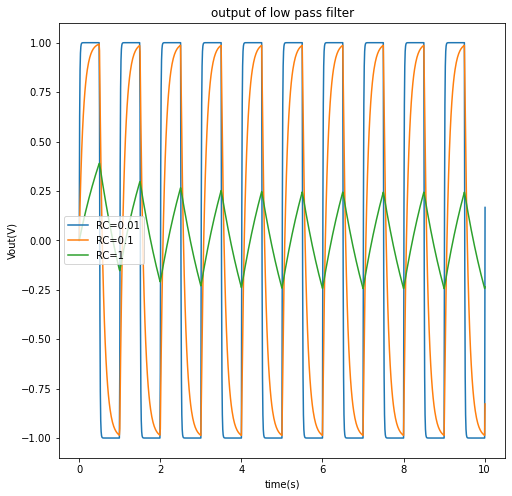

In [46]:
plt.figure(figsize=(8,8))
plt.plot(time,V1, label="RC=0.01")
plt.plot(time,V2, label="RC=0.1")
plt.plot(time,V3, label="RC=1")
plt.xlabel("time(s)")
plt.ylabel("Vout(V)")
plt.title('output of low pass filter')
plt.legend()

### What is Happening?

The increasing RC here is acting as a delay factor, when RC is very small, then basically as if tehre is no extra impedance, so the $V_{out]$ is varrying in almost a similar way to that of the $V_{in}$, in the case of RC=0.1 , we see that the change of $V_{out}$, slows down due to the increased impedance, it is like the charging curve of that of a capacitor, but the peak is nearly the same as that of $V_{in}$, in the case of RC=1, the response of $V_{out}$, is so delayed. 